In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import root_mean_squared_error

import warnings
warnings.filterwarnings('ignore')


In [2]:
back_df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data\Data Sets\AusGas.csv', index_col=0) 
back_df.index = pd.DatetimeIndex(back_df.index)
back_df.index = pd.to_datetime(back_df.index, errors='coerce')

back_df



,GasProd
Month,
1956-01-01,1709
1956-02-01,1646
1956-03-01,1794
1956-04-01,1878
1956-05-01,2173
...,...
1995-04-01,49013
1995-05-01,56624
1995-06-01,61739


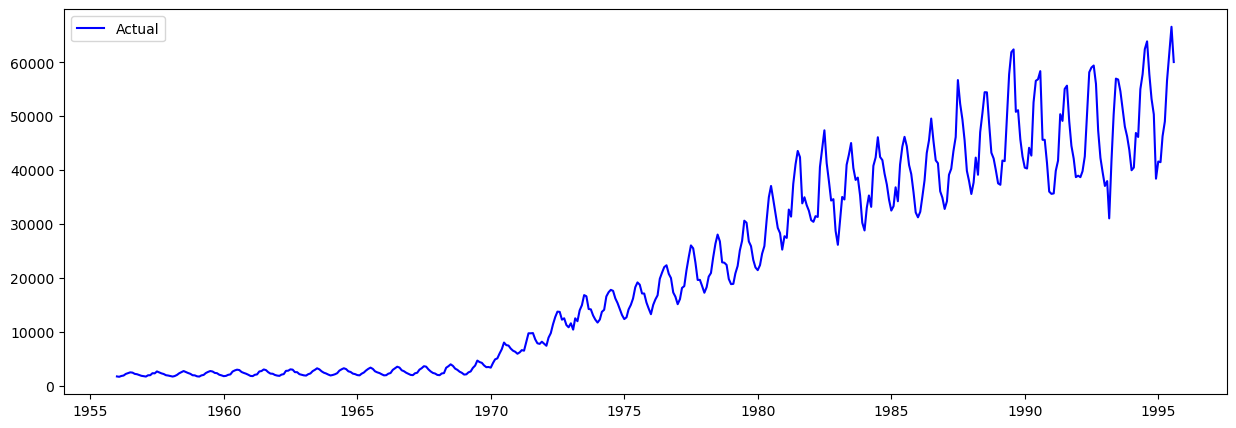

In [3]:
plt.figure(figsize=(15,5))
plt.plot(back_df.index, back_df['GasProd'], color='blue', label='Actual') 
plt.legend()
plt.show()

ARIMA

In [4]:
y=back_df['GasProd']

In [15]:
y_train = y[:-12]
y_test = y[-12:]
y_train.shape, y_test.shape

((464,), (12,))

In [16]:
order_of_auto_regressive_model = 3
order_of_differencing = 1  
order_of_moving_avg_model = 0 
 

model = ARIMA(
    y_train, 
    order=(
        order_of_auto_regressive_model, 
        order_of_differencing, 
        order_of_moving_avg_model
    ), 
    freq='MS',  
)

model_fit = model.fit()

RMSE:  3438.0890043599966


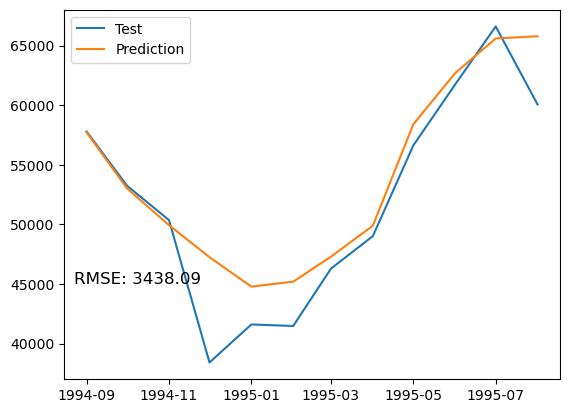

In [30]:
y_pred = model_fit.predict(start=len(y_train), end=(len(y_train) + len(y_test) - 1))

# Calculate RMSE
error = root_mean_squared_error(y_test, y_pred)
print("RMSE: ", error)

y_pred.index = y_test.index

plt.plot(y_test, label='Test')
plt.plot(y_pred, label='Prediction')
plt.text(9000, 45000,f'RMSE: {error:.2f}', fontsize=12)
plt.legend()
plt.show()

SARIMA

In [19]:
order_of_auto_regressive_model = 3
order_of_differencing = 1  
order_of_moving_avg_model = 0 
 

model = ARIMA(
    y_train, 
    order=(
        order_of_auto_regressive_model, 
        order_of_differencing, 
        order_of_moving_avg_model
    ), 
    freq='MS', 
    seasonal_order=(1,1,1,12)
)

model_fit = model.fit()

RMSE:  3438.0890043599966


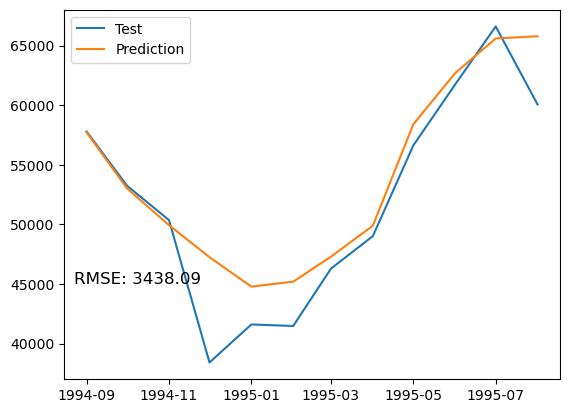

In [29]:
y_pred = model_fit.predict(start=len(y_train), end=(len(y_train) + len(y_test) - 1))

# Calculate RMSE
error = root_mean_squared_error(y_test, y_pred)
print("RMSE: ", error)

y_pred.index = y_test.index

plt.plot(y_test, label='Test')
plt.plot(y_pred, label='Prediction')
plt.text(9000, 45000,f'RMSE: {error:.2f}', fontsize=12)
plt.legend()
plt.show()

Auto ARIMA

In [9]:
from pmdarima.arima import auto_arima

In [74]:
def arima_with_plot(model):
    
    y_pred = model.predict(n_periods=len(y_test))

    # Calculate RMSE
    error = root_mean_squared_error(y_test, y_pred)
    print("RMSE: ", error)

    y_pred.index = y_test.index

    plt.figure(figsize=(15, 5))
    plt.plot(y_train, label='Train')
    plt.plot(y_test, label='Test')
    plt.plot(y_pred, label='Prediction')
    plt.legend()
    plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8355.010, Time=1.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8632.352, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8589.946, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8603.593, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8631.502, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8571.932, Time=0.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8577.053, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8327.013, Time=1.32 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8426.177, Time=0.93 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=8270.659, Time=1.43 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=8404.271, Time=1.05 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=8390.858, Time=1.74 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.44 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=8

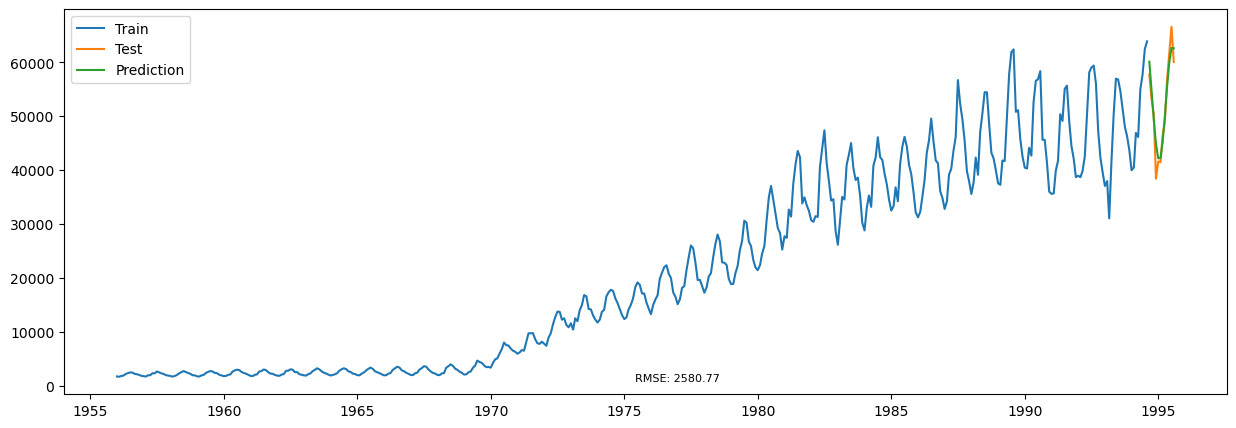

In [11]:
# Without seasonal component
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True) 
arima_with_plot(model)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.87 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8632.352, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8255.565, Time=1.11 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8438.509, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8631.502, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=8589.946, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=2.09 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=8170.932, Time=1.91 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=8438.053, Time=0.67 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=8218.659, Time=3.40 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=8208.277, Time=3.95 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=8371.138, Time=1.50 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=4.51 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=8219.426, Time=1.32 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept

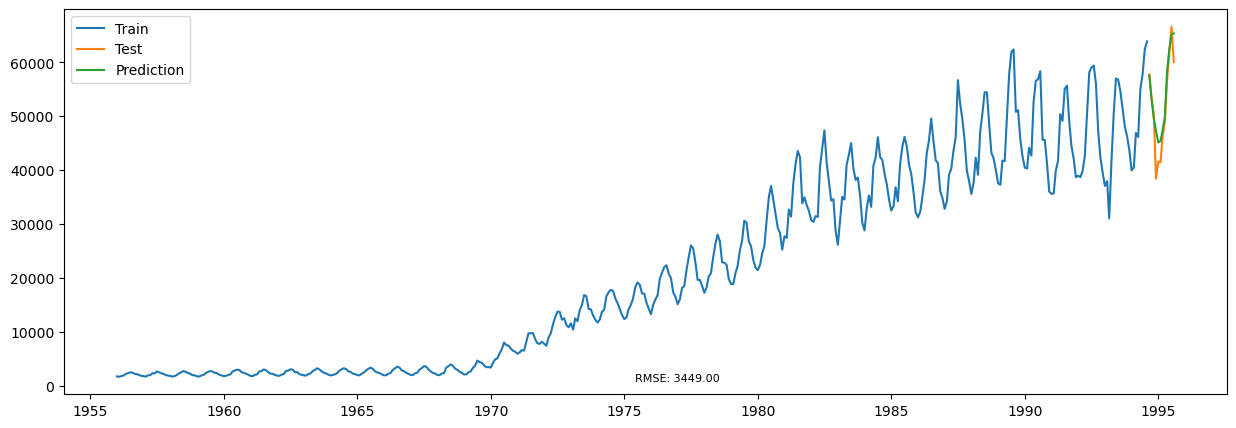

In [12]:
# With seasonal component
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, seasonal=True, m=12) 
arima_with_plot(model)

Holt

RSME: 14038.535542559828


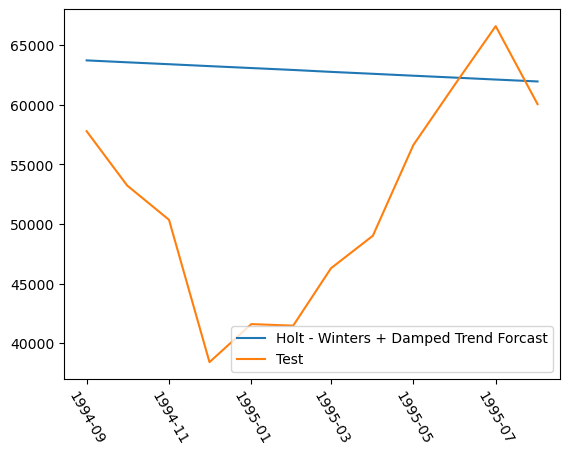

In [76]:
from math import sqrt
from statsmodels.tsa.holtwinters import Holt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing



damp_HW = Holt(y_train)
fit6 = damp_HW.fit()
fcast6 = fit6.forecast(len(y_test))


print(f'RSME: {sqrt(mean_squared_error(y_test, fcast6))}')
damp_HW_fcast = pd.Series(fcast6, index= y_test.index)
damp_HW_fcast.index = y_test.index

error = round(root_mean_squared_error(y_test, damp_HW_fcast),2)
plt.xticks(rotation=-60)
plt.plot(damp_HW_fcast, label = 'Holt - Winters + Damped Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

Holt Winters with Damping

RSME: 2312.5852786911396


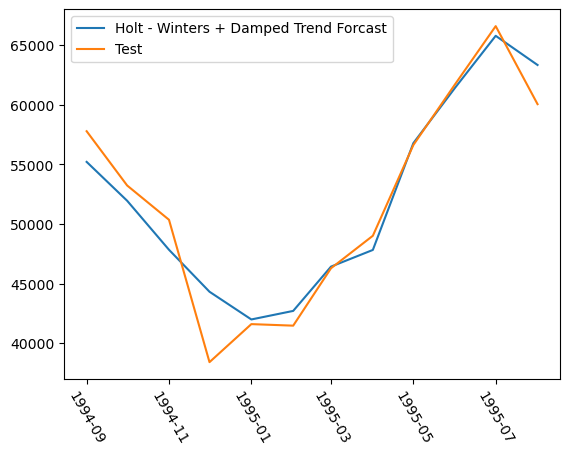

In [68]:
from math import sqrt
from statsmodels.tsa.holtwinters import Holt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing



damp_HW = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal= 'mul',damped_trend=True)
fit6 = damp_HW.fit()
fcast6 = fit6.forecast(len(y_test))


print(f'RSME: {sqrt(mean_squared_error(y_test, fcast6))}')
damp_HW_fcast = pd.Series(fcast6, index= y_test.index)
damp_HW_fcast.index = y_test.index

error = round(root_mean_squared_error(y_test, damp_HW_fcast),2)
plt.xticks(rotation=-60)
plt.plot(damp_HW_fcast, label = 'Holt - Winters + Damped Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

In [71]:
back_df_temp = back_df[back_df.index >= '1990-01-01']
back_df_temp

,GasProd
Month,
1990-01-01,40459
1990-02-01,40295
1990-03-01,44147
1990-04-01,42697
1990-05-01,52561
...,...
1995-04-01,49013
1995-05-01,56624
1995-06-01,61739


In [72]:
y = back_df_temp['GasProd'] 
y_train = y[:-12]
y_test = y[-12:]
y_train.shape, y_test.shape

((56,), (12,))

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1087.961, Time=1.63 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1169.258, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1093.681, Time=0.52 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1119.047, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1367.673, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=1096.079, Time=0.72 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=1097.214, Time=1.02 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=1095.726, Time=2.09 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=1097.045, Time=1.54 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=1097.114, Time=0.28 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=1096.771, Time=1.42 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=1096.649, Time=1.49 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=1097.547, Time=2.34 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=1094.926, Time=0.54 sec
 ARIMA(2,0,1)(1,0,1

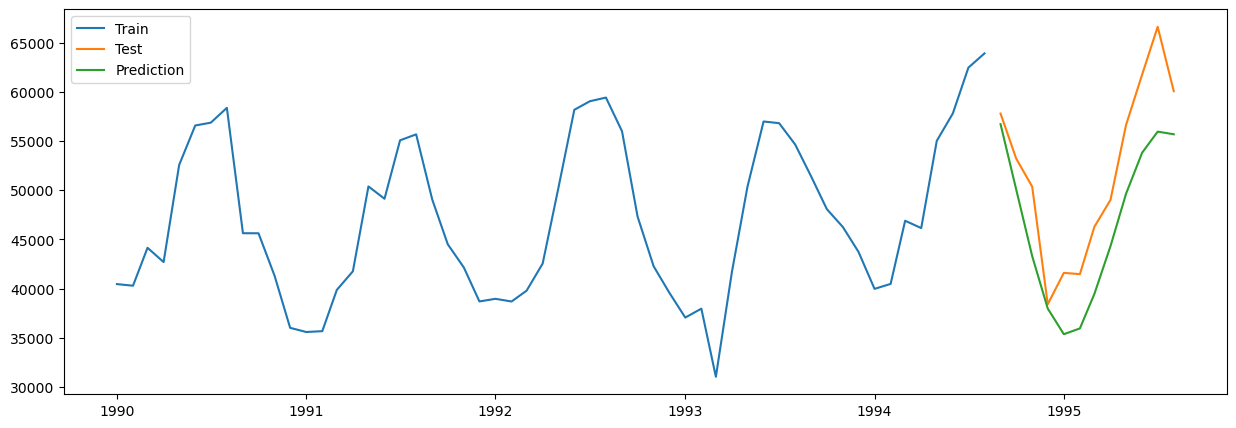

In [75]:
# With seasonal component
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, seasonal=True, m=12) 
arima_with_plot(model)

Box Cox With Auto ARIMA and Holt Winters

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=409.132, Time=2.72 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=951.615, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=536.353, Time=0.61 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=745.125, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=952.252, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=529.147, Time=2.79 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=523.358, Time=2.22 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=419.635, Time=6.44 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=428.980, Time=5.84 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=578.135, Time=0.95 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=9.34 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=463.668, Time=5.63 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=397.539, Time=6.80 sec
 ARIMA(1,1,2)(2,0,2)[12] intercept   : AIC=394.738, Time=5.96 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept   

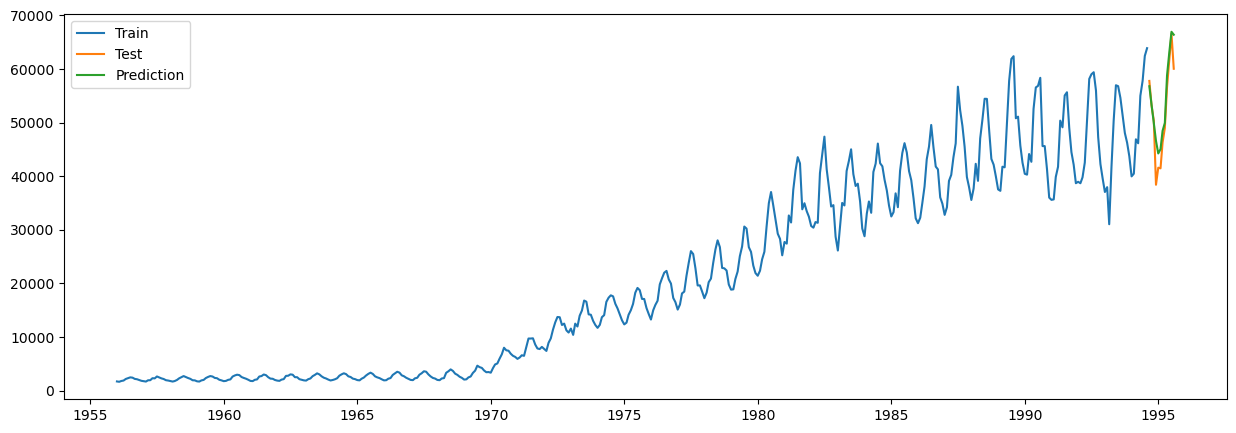

In [9]:
from scipy.special import boxcox, inv_boxcox
from pmdarima.arima import auto_arima

lamb = 0.2
y=back_df['GasProd']
 
# Train and test split
y_trian = y[:-12]
y_test = y[-12:]

y_trans_trn = boxcox(y_trian, lamb)


# With seasonal component
model = auto_arima(y_trans_trn, trace=True, error_action='ignore', suppress_warnings=True, seasonal=True, m=12) 
y_trans_pred = model.predict(len(y_test))

# inverse box cox transformation
y_pred = inv_boxcox(y_trans_pred, lamb)

# RMSE
error = root_mean_squared_error(y_test, y_pred)
print("RMSE: ", error)

# Set index
y_pred.index = y_test.index


# Plot
plt.figure(figsize=(15, 5))
plt.plot(y_trian, label='Train')
plt.plot(y_test, label='Test')
plt.plot(y_pred, label='Prediction')
plt.legend()
plt.show()

RSME: 2300.9941931833873


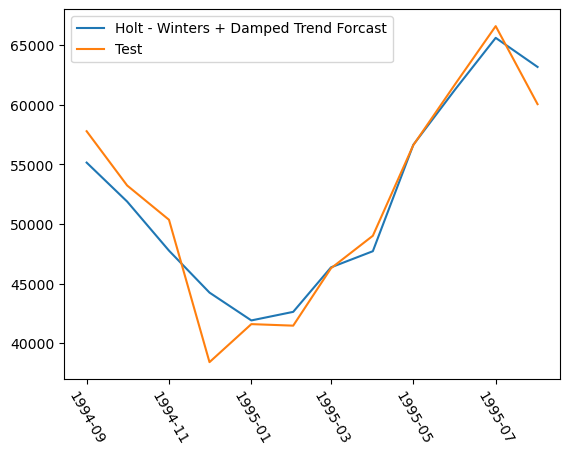

In [18]:
from math import sqrt
from statsmodels.tsa.holtwinters import Holt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing


lamb = 1.2
y=back_df['GasProd']
 
# Train and test split
y_trian = y[:-12]
y_test = y[-12:]

y_trans_trn = boxcox(y_trian, lamb)



damp_HW = ExponentialSmoothing(y_trans_trn, seasonal_periods=12, trend='add', seasonal= 'mul',damped_trend=True)
fit6 = damp_HW.fit()
fcast6_trans = fit6.forecast(len(y_test))

fcast6 = inv_boxcox(fcast6_trans, lamb)

print(f'RSME: {sqrt(mean_squared_error(y_test, fcast6))}')


damp_HW_fcast = pd.Series(fcast6, index= y_test.index)
damp_HW_fcast.index = y_test.index


error = round(root_mean_squared_error(y_test, damp_HW_fcast),2)
plt.xticks(rotation=-60)
plt.plot(damp_HW_fcast, label = 'Holt - Winters + Damped Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()